# Visualization with Matplotlib

## General Matplotlib Tips

Before we dive into the details of creating visualizations with Matplotlib, there are a few useful things you should know about using the package.

### Importing Matplotlib


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

The ``plt`` interface is what we will use most often, as we shall see throughout this module.

### Setting Styles

In [2]:
plt.style.use('default')

Throughout this section, we will adjust this style as needed.
Note that the stylesheets used here are supported as of Matplotlib version 1.5; if you are using an earlier version of Matplotlib, only the default style is available.
For more information on stylesheets, see https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html

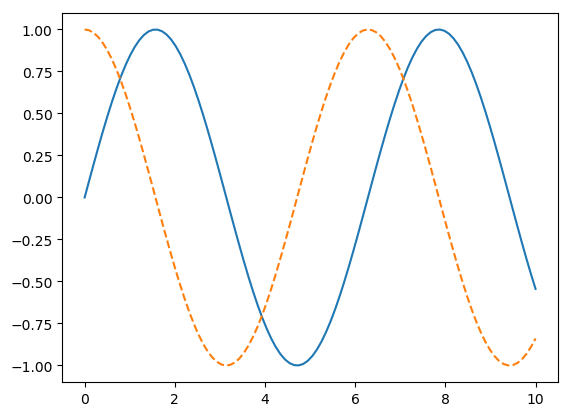

In [3]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [4]:
fig.savefig('my_figure.png')

We now have a file called ``my_figure.png`` in the current working directory:

In [5]:
!dir -lh my_figure.png

 Volume in drive D is Tralha
 Volume Serial Number is C6A9-D324

 Directory of D:\Documentos\Curso IA\#3 Data Manipulation & Visualization\Visualization


 Directory of D:\Documentos\Curso IA\#3 Data Manipulation & Visualization\Visualization

07/02/2019  17:50            37ÿ468 my_figure.png
               1 File(s)         37ÿ468 bytes
               0 Dir(s)  538ÿ120ÿ290ÿ304 bytes free


To confirm that it contains what we think it contains, let's use the IPython ``Image`` object to display the contents of this file:

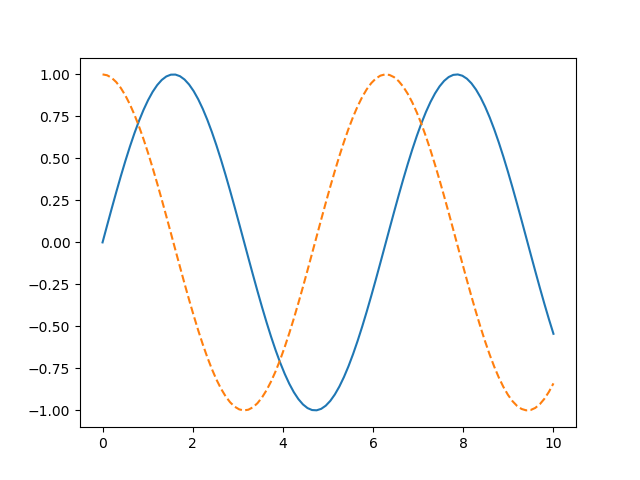

In [6]:
from IPython.display import Image
Image('my_figure.png')

In ``savefig()``, the file format is inferred from the extension of the given filename.
Depending on what backends you have installed, many different file formats are available.
The list of supported file types can be found for your system by using the following method of the figure canvas object:

In [7]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

Note that when saving your figure, it's not necessary to use ``plt.show()`` or related commands discussed earlier.

## Two Interfaces for the Price of One

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

#### MATLAB-style Interface

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the pyplot (``plt``) interface.
For example, the following code will probably look quite familiar to MATLAB users:

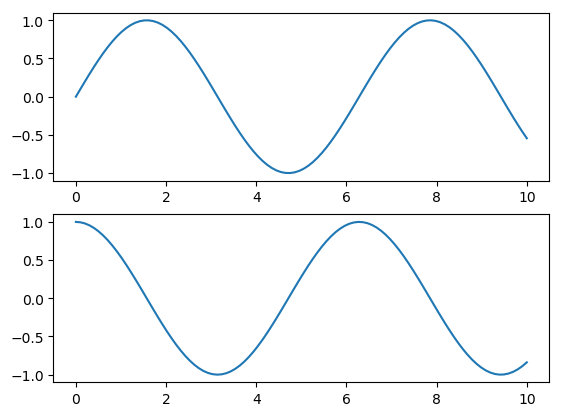

In [8]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

It is important to note that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all ``plt`` commands are applied.
You can get a reference to these using the ``plt.gcf()`` (get current figure) and ``plt.gca()`` (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems.
For example, once the second panel is created, how can we go back and add something to the first?
This is possible within the MATLAB-style interface, but a bit clunky.
Fortunately, there is a better way.

#### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure.
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects.
To re-create the previous plot using this style of plotting, you might do the following:

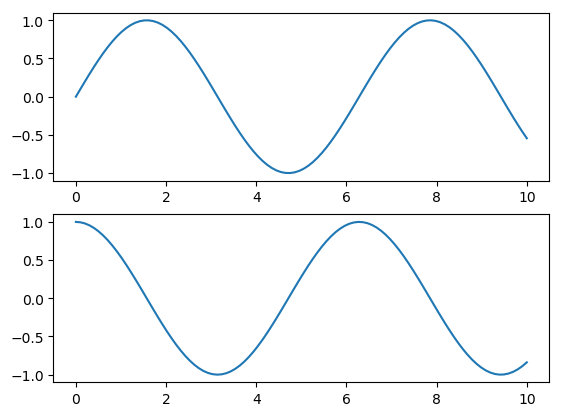

In [9]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated.
Throughout this chapter, we will switch between the MATLAB-style and object-oriented interfaces, depending on what is most convenient.
In most cases, the difference is as small as switching ``plt.plot()`` to ``ax.plot()``, but there are a few gotchas that we will highlight as they come up in the following sections.